# Simple test of compressed sensing methods

In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *
from nopt.tests import *

import scipy

In [2]:
m = 500
n = 1000
Amat = np.random.normal(0,1, (m,n))
A = scipy.sparse.linalg.aslinearoperator(Amat)
k = 100
r = 20
HTs = Sparsity(k)

In [3]:
x_true = np.random.normal(0,1, (n, 1)) / np.sqrt(n)
sub, x_true = HTs.project(x_true)
b = A.matvec(x_true)
problem = LinearProblem(A, b, HTs, x_true = x_true)

In [4]:
solver = NIHT(logverbosity = 2, verbosity=1)
x, opt_log = solver.solve(problem)

Terminated - target objective reached after 0.03 seconds.



In [5]:
np.linalg.norm(x - x_true, 2)/ np.linalg.norm(x_true, 2)

1.1815935961598211e-05

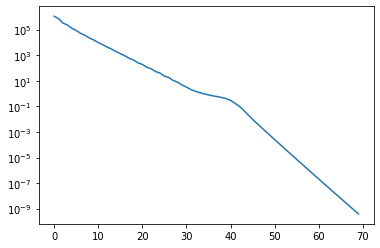

In [6]:
plt.semilogy(opt_log['iterations']['fx'] / np.linalg.norm(b))